# Exercise SoSe 2024
We want you to illustrate data. For questions, there are three Q and A session coming up. We recommend taking part in these Q and A sessions and be prepared.

* Results must be visualized
* Describe what you do (code)

**You are not allowed to use data already used in our Jupyter Notebooks!** We provide Links in the Jupyter Notebook for help. Take a look at the resource chapter in Moodle, there you many links, that can help. 

Remember, this is an exam admission task. We expect short, precise implementations. Sections/distances should be chosen so that your computer does not need too long computing times.  

Useful links:
* The actual Map [Open Street Map](https://www.openstreetmap.org/search?query=Aachen#map=12/50.7597/6.0964&layers=D)
* Open Street Map tag information for querying [Wind](https://wiki.openstreetmap.org/wiki/Tag:generator:source%3Dwind), [Water](https://wiki.openstreetmap.org/wiki/Tag:plant:source%3Dhydro), [Solar](https://wiki.openstreetmap.org/wiki/Tag:generator:source=solar?uselang=en), [Geothermal](https://wiki.openstreetmap.org/wiki/Tag:plant:source%3Dgeothermal), [Biomass](https://wiki.openstreetmap.org/wiki/DE:Tag:generator:source%3Dbiomass)


## How to proceed
* Select your favourite spot in Aachen and mark it on an interactive map using an icon of your choice.
* Search for one renewable energy resource position in and around the selected city and visualize the data in your interactive map using the library Python Ipyleaflet using for example an icon. 
* Finally, calculate the shortest path between your favourite spot in Aachen and the renewable energy resource and visualize it as well in your interactive map. 


In [113]:
#Space for your code and text, add as many cells as you need!

## Submission
**FINAL Submission 23.06.2024 for your Jupyter Notebook**  
Required for exam admission.
Please submit:  
* **THIS** juypter notebook file filled with your code
* All used source/ created/ data files 

Submit as **ZIP** file, named like: **surname_student-id_course_year** in **RWTHMoodle**.
If you have worked in pairs, please name the file as follows: **surname1_student-id1_surname2_student-id2_course_year**

In [114]:
#Import all necessary packages/ libraries 
import folium
import osmnx as ox
import pandas as pd
import geopandas as gpd
import os
import sys
import matplotlib.pyplot as plt 
import networkx as nx
import contextily
from descartes import PolygonPatch
from shapely.geometry import LineString
from shapely.geometry import Point
from shapely.geometry import Polygon
from IPython.display import Image
from ipyleaflet import Map, GeoData, basemaps, LayersControl
from ipyleaflet import Marker, Icon, Map , Popup
from ipywidgets import HTML
%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

2024-06-15 22:09:04 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2024-06-15 22:09:04 Projected GeoDataFrame to epsg:4326
2024-06-15 22:09:04 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2024-06-15 22:09:04 Projected GeoDataFrame to epsg:4326
2024-06-15 22:09:04 Requesting data within polygon from API in 1 request(s)
2024-06-15 22:09:04 Retrieved response from cache file "cache/861ff608021f790f342ca2111b5e748fdfc65335.json"
2024-06-15 22:09:04 Got all network data within polygon from API in 1 request(s)
2024-06-15 22:09:04 Creating graph from downloaded OSM data...
2024-06-15 22:09:05 Created graph with 32149 nodes and 71092 edges
2024-06-15 22:09:05 Added length attributes to graph edges
2024-06-15 22:09:05 Identifying all nodes that lie outside the polygon...
2024-06-15 22:09:07 Created nodes GeoDataFrame from graph
2024-06-15 22:09:07 Created r-tree spatial index for 32149 geom

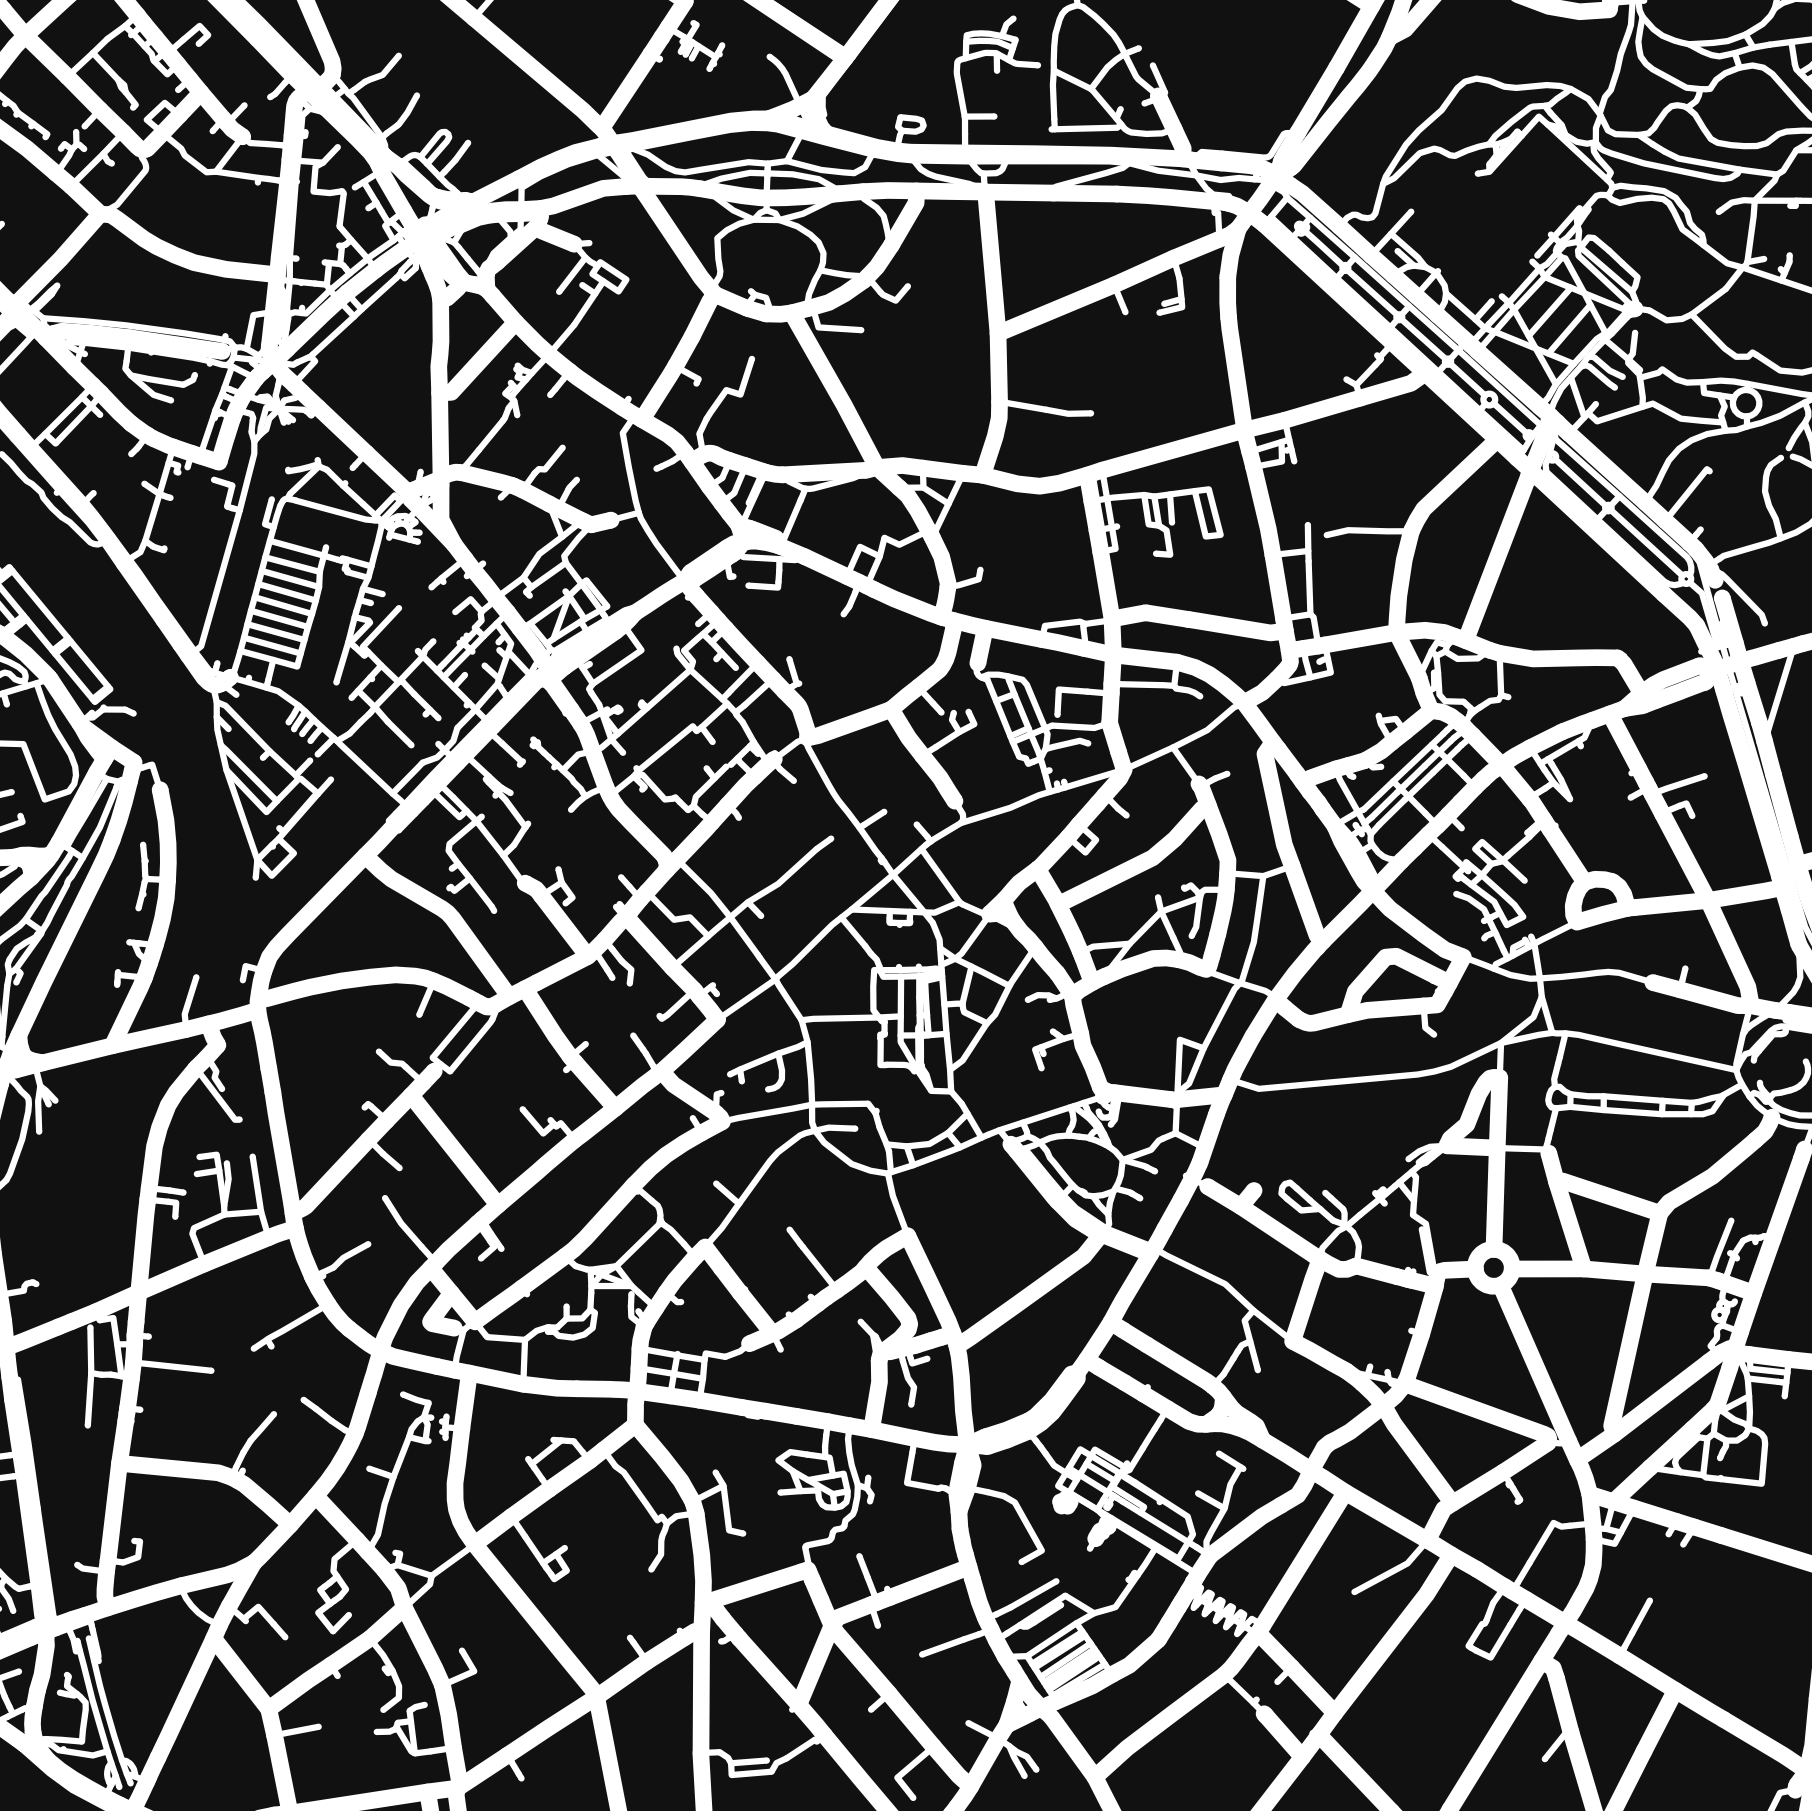

In [115]:
#Setting values for parameters
dpi=300
#By default this is in meters
size=250
place = "Aachen, Germany"
fp = f"./aachen_col_schwarzplan.png"
#Querying OSM data using a city name
fig, ax = ox.plot_figure_ground(
    address=place,
    network_type="walk",
    filepath=fp,
    dpi=dpi,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [116]:
#Defining walk or building tags for quering OSM for city of Aachen. Also, using the Aachen city center coordinates as a reference point.
#OSM data for all the buildings at a distance of 5km from city center are queried.
tags={"walk": True , "building" : True}
point = (50.7717, 6.0841,)
size=500
dist = 10000
#OSMnx method geometries_from_point queryies OSM data using a point
gdf = ox.geometries_from_point(point, tags, dist=dist)
gdf_proj = ox.project_gdf(gdf)

In [117]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 177886 entries, ('node', 250571258) to ('relation', 17595912)
Columns: 561 entries, barrier to police
dtypes: geometry(1), object(560)
memory usage: 767.6+ MB


In [118]:
gdf.head()

barrier  fee                  geometry addr:city  \
element_type osmid                                                        
node         250571258     NaN  NaN  POINT (6.04330 50.76780)       NaN   
             282011302     NaN  NaN  POINT (6.05237 50.74989)       NaN   
             302047395     NaN  NaN  POINT (6.05718 50.73386)       NaN   
             525400509     NaN  NaN  POINT (6.22042 50.72969)       NaN   
             783205525     NaN  NaN  POINT (6.08128 50.69030)  Eynatten   

                       addr:housenumber addr:postcode     addr:street access  \
element_type osmid                                                             
node         250571258              NaN           NaN             NaN    NaN   
             282011302              NaN           NaN             NaN    NaN   
             302047395              NaN           NaN             NaN    NaN   
             525400509              NaN           NaN             NaN    NaN   
             783205525            35-37          4731  Eupener Straße    NaN   

                                            name opening_hours  ...  \
element_type osmid                                              ...   
node         250571258                       NaN           NaN  ...   
             282011302                       NaN           NaN  ...   
             302047395                       153           NaN  ...   
             525400509  Pfarrheim Goldener Stern           NaN  ...   
             783205525                        Q8          24/7  ...   

                       animal_shelter ways defensive_works scout community  \
element_type osmid                                                           
node         250571258            NaN  NaN             NaN   NaN       NaN   
             282011302            NaN  NaN             NaN   NaN       NaN   
             302047395            NaN  NaN             NaN   NaN       NaN   
             525400509            NaN  NaN             NaN   NaN       NaN   
             783205525            NaN  NaN             NaN   NaN       NaN   

                       community:de community:gender addr:city_1  \
element_type osmid                                                 
node         250571258          NaN              NaN         NaN   
             282011302          NaN              NaN         NaN   
             302047395          NaN              NaN         NaN   
             525400509          NaN              NaN         NaN   
             783205525          NaN              NaN         NaN   

                       addr:street_1 police  
element_type osmid                           
node         250571258           NaN    NaN  
             282011302           NaN    NaN  
             302047395           NaN    NaN  
             525400509           NaN    NaN  
             783205525           NaN    NaN  

[5 rows x 561 columns]

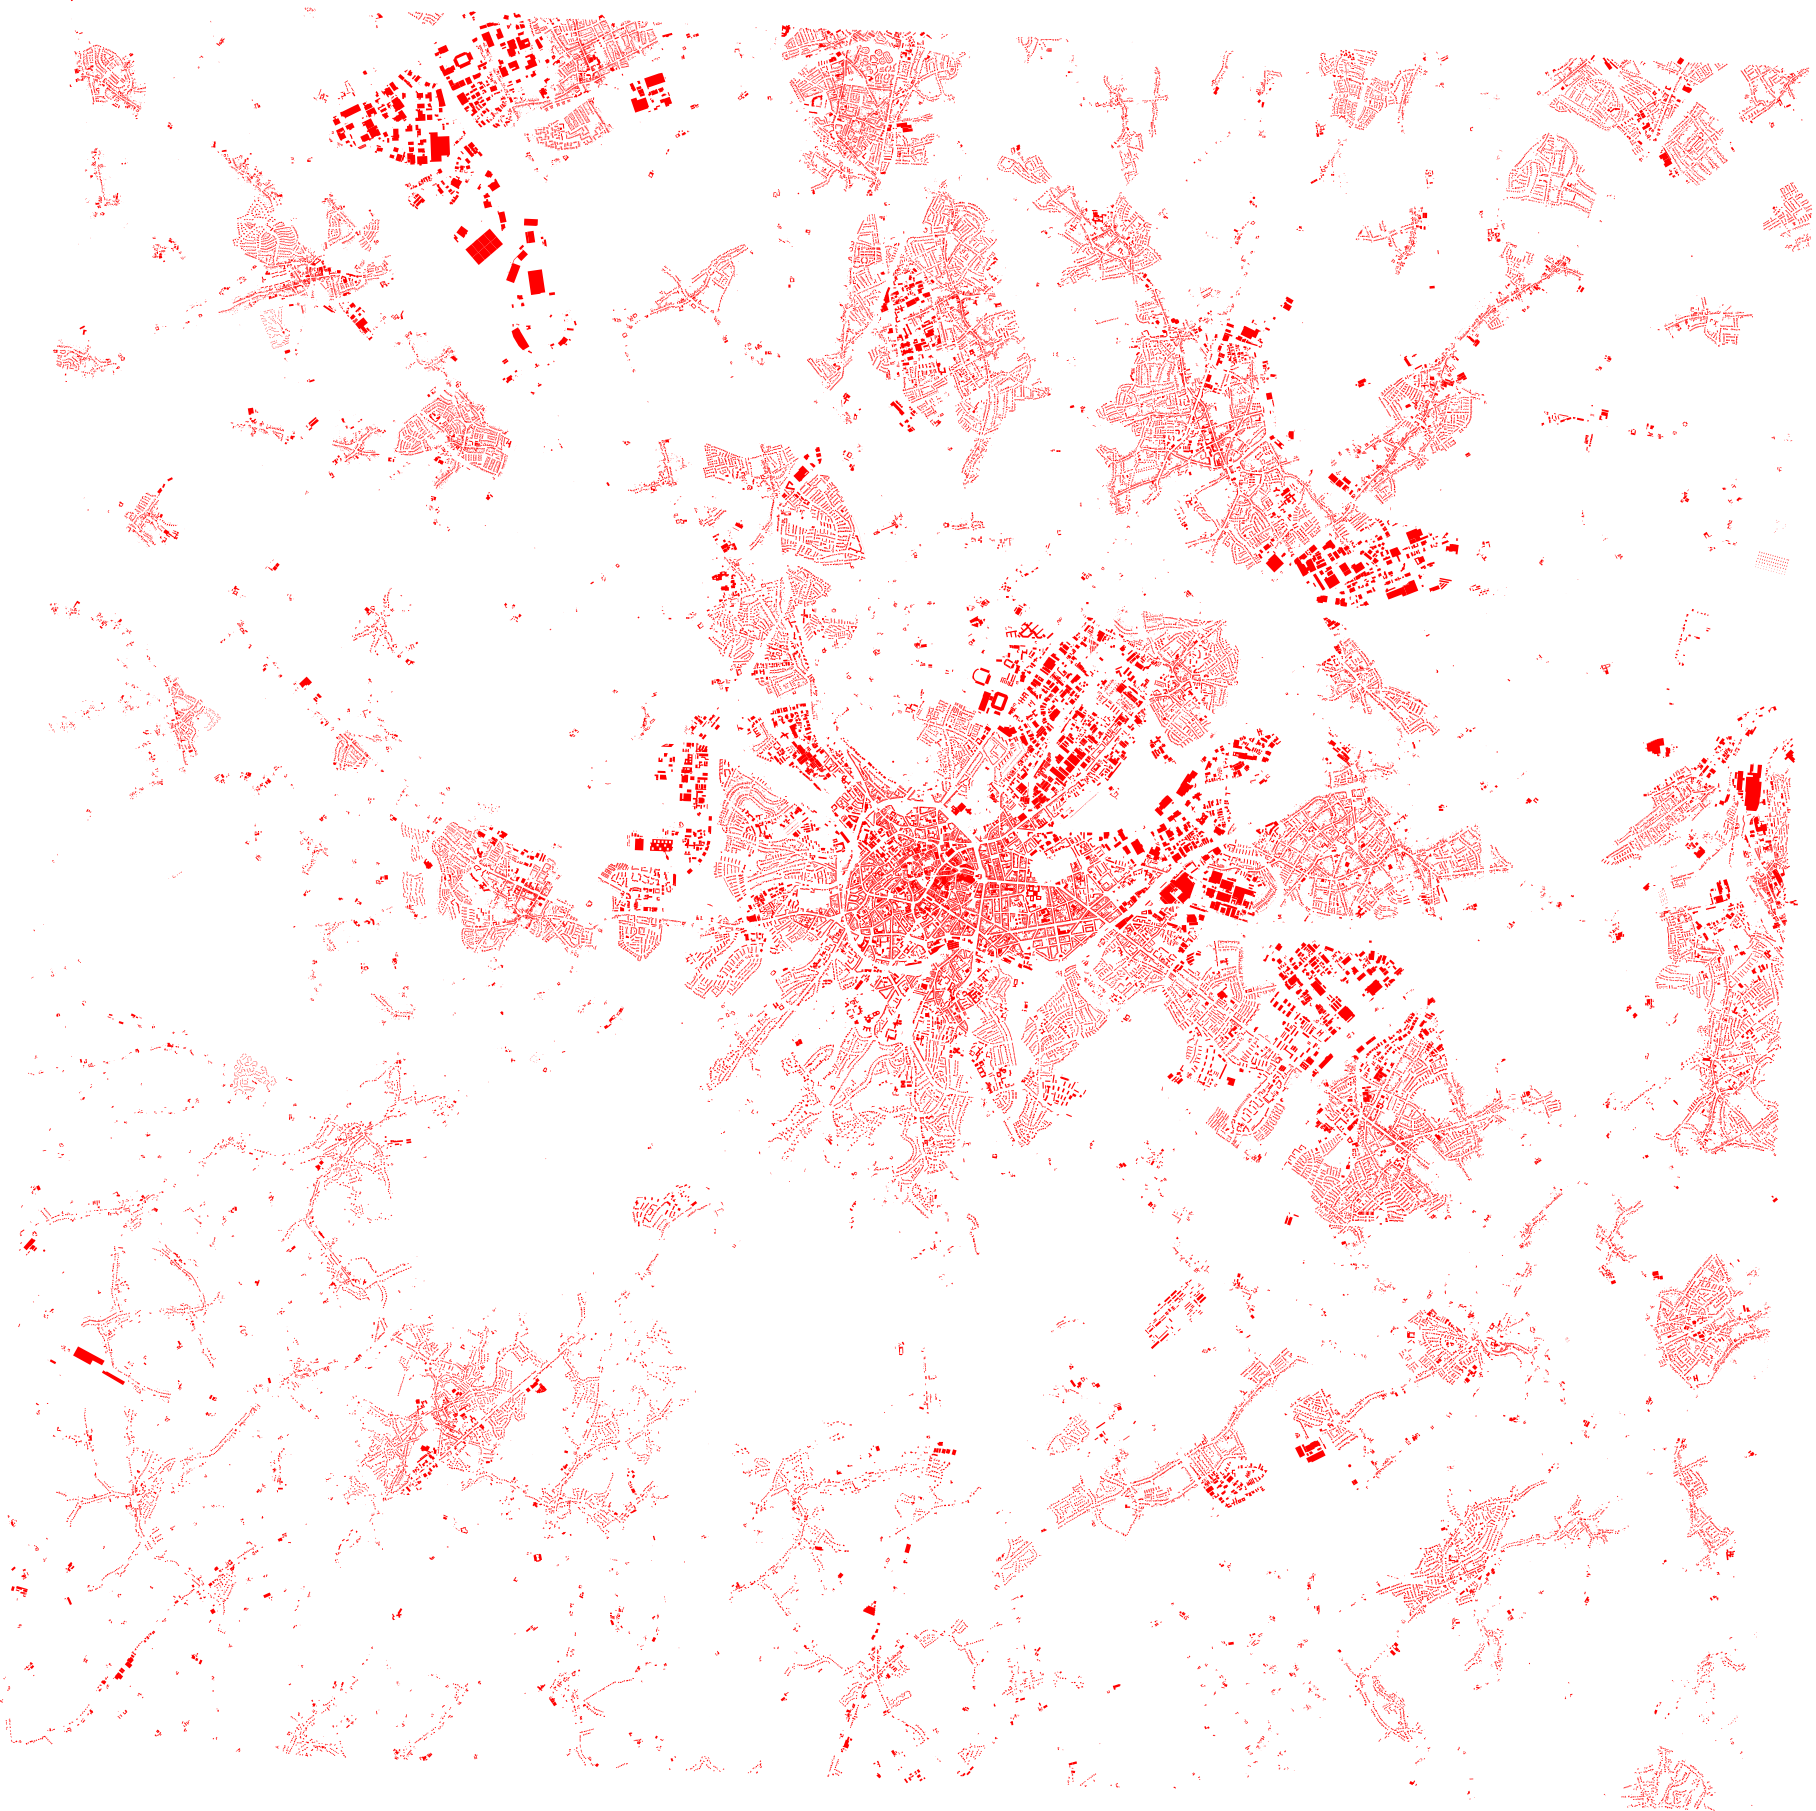

In [119]:
#Quering OSM by using the defined point.
#This figure ground plan captures all the buildings or highway at a distance of 5km from city center.
bbox = ox.utils_geo.bbox_from_point(point=point, dist=dist, project_utm=True)
fp = f"./aachen_col_schwarzplan.png"
#Generating figure ground plan for the city of aachen and colouring all the buildings as red and everything in the background as white
fig, ax = ox.plot_footprints(
    gdf_proj,
    bbox=bbox,
    bgcolor="white",
    color="red",
    filepath=fp,
    dpi=300,
    save=True,
    show=False,
    close=True,
)
Image(fp, height=size, width=size)

In [120]:
#Creating an interactive map for aachen using iphyleaflet and city center coordinates as a point of reference.
center = (50.7717, 6.0841)
map_aachen = Map(center=center, zoom=11)
map_aachen

Map(center=[50.7717, 6.0841], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [121]:
#Adding the GeoDataFrame to the map.
#GeodataFrame contains the figure ground plan of Jülich. So, adding the figure ground plan stored in 'gdf' into an interactive map with specific style defined below.
#geo_data = GeoData(geo_dataframe= gdf, style={'color': 'red', 'fillColor': '#3c758c', 'opacity':0.40, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6})
#map_aachen.add_layer(geo_data)


In [122]:
#map_aachen

## (2) Searching for data on sustainable energy in and around the aachen

In [123]:
#In this second part of the exercise, again the chosen city is aahen. 
#For this city, new data of renewable energies, particularly, wind turbines in and around the city of aachen are queried using OSM data.
#Further, these locations of wind turbines along with the location of city center are marked in the interactive map and few messages are added for these locations.

In [124]:
#Now, for the renewable energies, wind turbine is selected as the type of generator method.
#Defining tag for this 'wind turbine' renewable energy. OSM data for all the wind turbines at a distance of 10km from city center are queried.
tag = {"generator:method" : "wind_turbine"}
#The value of point here is the aachen city center coordinates.
point = (50.7717, 6.0841)
dist = 10000
gdf2 = ox.geometries_from_point(point, tag, dist=dist)
gdf2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 24 entries, ('node', 161839399) to ('node', 11916543985)
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   generator:method              24 non-null     object  
 1   generator:source              24 non-null     object  
 2   power                         24 non-null     object  
 3   geometry                      24 non-null     geometry
 4   website                       4 non-null      object  
 5   generator:output:electricity  14 non-null     object  
 6   name                          1 non-null      object  
 7   wikidata                      1 non-null      object  
 8   wikipedia                     1 non-null      object  
 9   height:hub                    6 non-null      object  
 10  manufacturer                  17 non-null     object  
 11  model                         15 non-null     object  
 12  rotor:d

In [125]:
gdf2

generator:method generator:source      power  \
element_type osmid                                                      
node         161839399       wind_turbine             wind  generator   
             161839401       wind_turbine             wind  generator   
             161839402       wind_turbine             wind  generator   
             161839404       wind_turbine             wind  generator   
             161839407       wind_turbine             wind  generator   
             161839412       wind_turbine             wind  generator   
             161839415       wind_turbine             wind  generator   
             255147068       wind_turbine             wind  generator   
             274754681       wind_turbine             wind  generator   
             274754682       wind_turbine             wind  generator   
             274754684       wind_turbine             wind  generator   
             477562353       wind_turbine             wind  generator   
             1038641972      wind_turbine             wind  generator   
             1617174183      wind_turbine             wind  generator   
             4783347502      wind_turbine             wind  generator   
             4793724628      wind_turbine             wind  generator   
             4793724633      wind_turbine             wind  generator   
             5763436886      wind_turbine             wind  generator   
             6236767239      wind_turbine             wind  generator   
             6236767241      wind_turbine             wind  generator   
             6236767243      wind_turbine             wind  generator   
             6236767248      wind_turbine             wind  generator   
             11916543984     wind_turbine             wind  generator   
             11916543985     wind_turbine             wind  generator   

                                          geometry  \
element_type osmid                                   
node         161839399    POINT (6.02988 50.80980)   
             161839401    POINT (6.02824 50.81192)   
             161839402    POINT (6.02279 50.81068)   
             161839404    POINT (6.02517 50.80872)   
             161839407    POINT (6.01788 50.80867)   
             161839412    POINT (6.02069 50.80692)   
             161839415    POINT (6.02363 50.80514)   
             255147068    POINT (6.19927 50.84160)   
             274754681    POINT (6.13998 50.83937)   
             274754682    POINT (6.14557 50.83883)   
             274754684    POINT (6.15192 50.83514)   
             477562353    POINT (6.13499 50.84655)   
             1038641972   POINT (6.20080 50.84474)   
             1617174183   POINT (5.99683 50.84787)   
             4783347502   POINT (6.02852 50.82270)   
             4793724628   POINT (6.19715 50.83900)   
             4793724633   POINT (6.20166 50.84017)   
             5763436886   POINT (6.12997 50.84598)   
             6236767239   POINT (6.02450 50.84058)   
             6236767241   POINT (6.02442 50.83726)   
             6236767243   POINT (6.02556 50.83450)   
             6236767248   POINT (6.02566 50.82531)   
             11916543984  POINT (6.01152 50.84728)   
             11916543985  POINT (6.01419 50.84496)   

                                                                    website  \
element_type osmid                                                            
node         161839399                                                  NaN   
             161839401    https://aachen-hat-energie.de/wind/eurowindpar...   
             161839402    https://aachen-hat-energie.de/wind/eurowindpar...   
             161839404                                                  NaN   
             161839407    https://aachen-hat-energie.de/wind/eurowindpar...   
             161839412                       https://aachen-hat-energie.de/   
             161839415                                                  NaN   
          

In [126]:
gdf3 = gdf2.copy()

In [127]:
def extract(a):
    return (a.x, a.y)

In [128]:
gdf3['geometry'] = gdf3['geometry'].apply(extract)

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1350: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [129]:
gdf3.head(7)

generator:method generator:source      power  \
element_type osmid                                                    
node         161839399     wind_turbine             wind  generator   
             161839401     wind_turbine             wind  generator   
             161839402     wind_turbine             wind  generator   
             161839404     wind_turbine             wind  generator   
             161839407     wind_turbine             wind  generator   
             161839412     wind_turbine             wind  generator   
             161839415     wind_turbine             wind  generator   

                                       geometry  \
element_type osmid                                
node         161839399  (6.0298829, 50.8098032)   
             161839401  (6.0282356, 50.8119246)   
             161839402  (6.0227941, 50.8106838)   
             161839404  (6.0251722, 50.8087162)   
             161839407  (6.0178778, 50.8086691)   
             161839412  (6.0206898, 50.8069203)   
             161839415  (6.0236314, 50.8051434)   

                                                                  website  \
element_type osmid                                                          
node         161839399                                                NaN   
             161839401  https://aachen-hat-energie.de/wind/eurowindpar...   
             161839402  https://aachen-hat-energie.de/wind/eurowindpar...   
             161839404                                                NaN   
             161839407  https://aachen-hat-energie.de/wind/eurowindpar...   
             161839412                     https://aachen-hat-energie.de/   
             161839415                                                NaN   

                       generator:output:electricity  \
element_type osmid                                    
node         161839399                          NaN   
             161839401                          NaN   
             161839402                          NaN   
             161839404                          NaN   
             161839407                      1800 kW   
             161839412                      1500 kW   
             161839415                          NaN   

                                               name wikidata  \
element_type osmid                                             
node         161839399                          NaN      NaN   
             161839401                          NaN      NaN   
             161839402                          NaN      NaN   
             161839404                          NaN      NaN   
             161839407                          NaN      NaN   
             161839412  Besucherwindanlage Windfang  Q830736   
             161839415                          NaN      NaN   

                                             wikipedia height:hub  \
element_type osmid                                                  
node         161839399                             NaN        NaN   
             161839401                             NaN        NaN   
             161839402                             NaN        NaN   
             161839404                             NaN        NaN   
             161839407                             NaN        NaN   
             161839412  de:Besucherwindanlage Windfang        NaN   
             161839415                             NaN        NaN   

                       manufacturer model rotor:diameter generator:type  \
element_type osmid                                                        
node         161839399          NaN   NaN            NaN            NaN   
             161839401          NaN   NaN            NaN            NaN   
             161839402          NaN   NaN            NaN            NaN   
             161839404          NaN   NaN            NaN            NaN   
             161839407          NaN   NaN            NaN            NaN   
         

<AxesSubplot:>

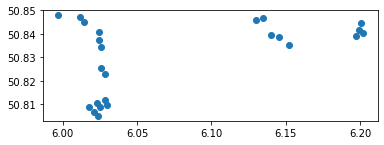

In [130]:
#Extracting all elements which are wind turbine and plotting them on the graph.
gdf2[gdf2['generator:method'] == "wind_turbine"].plot()

## (3) Visualize the data in an interactive map with the library Python Ipyleaflet

In [131]:
#Setting up a map called aachen_turbine, with an appropriate zoom , for showing all the wind turbine locations on an interactive map.
aachen_windturbine = Map(center= point, zoom = 11)
geo_data = GeoData(geo_dataframe= gdf2, style={'color': 'red', 'fillColor': '#3c758c', 'opacity':0.20, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6})
aachen_windturbine.add_layer(geo_data)
aachen_windturbine

Map(center=[50.7717, 6.0841], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [132]:
#Adding another marker to locate the city center of aachen.
marker = Marker(location=center, draggable=False)
aachen_windturbine.add_layer(marker);
aachen_windturbine

Map(center=[50.7717, 6.0841], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [139]:
aachenmitte = ox.geocode(center)
windturbines = ox.geocode(windturbine_point1)

In [135]:
#Attention, getting the whole of Aachen takes many minutes, we will get the inner city only
G = ox.graph_from_point(point, dist=2000, network_type="walk")

2024-06-15 22:28:43 Created bbox 966.0 m from (50.776351, 6.083862): 50.78503843444086,50.76766356555914,6.097600351666069,6.070123648333931
2024-06-15 22:28:43 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2024-06-15 22:28:43 Projected GeoDataFrame to epsg:4326
2024-06-15 22:28:43 Projected GeoDataFrame to +proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
2024-06-15 22:28:43 Projected GeoDataFrame to epsg:4326
2024-06-15 22:28:43 Requesting data within polygon from API in 1 request(s)
2024-06-15 22:28:43 Retrieved response from cache file "cache/1f26a80827313f805f15e53a6f62202953da7185.json"
2024-06-15 22:28:43 Got all network data within polygon from API in 1 request(s)
2024-06-15 22:28:43 Creating graph from downloaded OSM data...
2024-06-15 22:28:44 Created graph with 15030 nodes and 33348 edges
2024-06-15 22:28:44 Added length attributes to graph edges
2024-06-15 22:28:44 Identifying all nodes that lie out

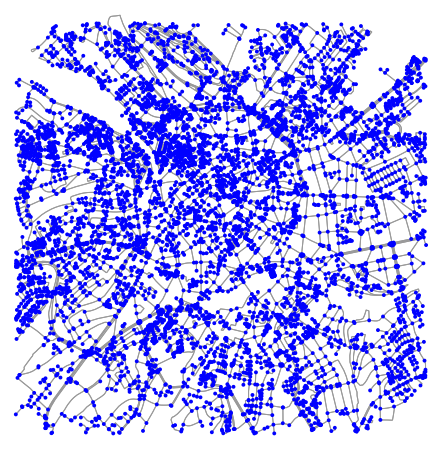

In [136]:
# Let us get out our graph from OSM first
ax, fig = ox.plot_graph(G, node_color='b', node_zorder=1, bgcolor='#FFFFFF')

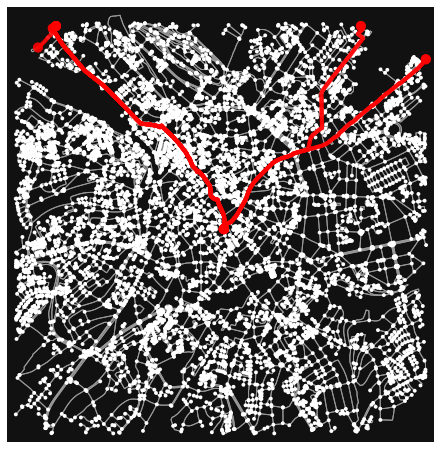

In [181]:
import matplotlib.pyplot as plt

windturbine_locations = gdf3.geometry.values

routes = []
for index, windturbine_location in enumerate(windturbine_locations):
    #Set start and end point (value)
    start = ox.nearest_nodes(G, center[1], center[0])
    dest  = ox.nearest_nodes(G, windturbine_location[0], windturbine_location[1])

    #Calculate the shortest path between start and end point
    route = ox.shortest_path(G, start, dest)
    routes.append(route)

fig, ax = ox.plot_graph_routes(G, routes);
fig.savefig('world.jpg');